In [1]:
import pandas as pd

# Partie I:
#### 1: chargement et fusionnement des données

In [2]:
data_p1 = pd.read_csv("dataset_P1(Nov2013-June2014).csv", delimiter=';',decimal=',');
data_p2 = pd.read_csv("dataset_P2(July2014-January2015).csv", delimiter=";",decimal=',');

In [3]:
data_p2.rename(columns={'m':'Price'},inplace=True)

In [4]:
df = pd.concat([data_p1,data_p2])

In [5]:
df

,Customer_ID,Date_purchase,Price
0,1,02/11/2013,69
1,2,04/11/2013,350
2,3,05/11/2013,69
3,4,07/11/2013,120
4,5,07/11/2013,120
...,...,...,...
5915,1715,26/08/2014,301.0
5916,1715,31/10/2014,35.0
5917,1715,27/09/2014,35.0
5918,1715,16/07/2014,248.0


#### 2 : nombre des valeurs manquants

In [6]:
df.isnull().sum()

Customer_ID       0
Date_purchase    15
Price            12
dtype: int64

#### 3 : les lignes qui ont au moins une valeur manquant

In [7]:
null_values = df[df.isnull().any(axis=1)]
null_values

,Customer_ID,Date_purchase,Price
65,36,NaN,784
194,57,01/12/2013,NaN
230,64,NaN,NaN
278,74,NaN,444
318,77,01/03/2014,NaN
351,81,NaN,343
453,94,NaN,NaN
519,104,NaN,97
584,113,NaN,48
636,123,08/03/2014,NaN


#### 4: Suppression des lignes avec les donnees manquants

In [8]:
df.dropna(inplace=True)
df.isnull().sum()

Customer_ID      0
Date_purchase    0
Price            0
dtype: int64

#### 5: Verfication des dates de transactions

In [9]:
df['Date_purchase'] = pd.to_datetime(df['Date_purchase'],dayfirst=True,errors="coerce")
df.dropna(inplace=True)
df

,Customer_ID,Date_purchase,Price
0,1,2013-11-02,69
1,2,2013-11-04,350
2,3,2013-11-05,69
3,4,2013-11-07,120
4,5,2013-11-07,120
...,...,...,...
5915,1715,2014-08-26,301.0
5916,1715,2014-10-31,35.0
5917,1715,2014-09-27,35.0
5918,1715,2014-07-16,248.0


In [10]:
import datetime as dt
dmin = dt.datetime(2013,11,1)
dmax = dt.datetime(2015,2,28)
hors_periode = df.loc[(df['Date_purchase'] > dmax) | (df['Date_purchase'] < dmin)]
df = df.loc[(df['Date_purchase'] <= dmax) & (df['Date_purchase'] >= dmin)]
hors_periode

,Customer_ID,Date_purchase,Price


#### 6 : Statistique du dataFrame

In [11]:
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')
df

,Customer_ID,Date_purchase,Price
0,1,2013-11-02,69.0
1,2,2013-11-04,350.0
2,3,2013-11-05,69.0
3,4,2013-11-07,120.0
4,5,2013-11-07,120.0
...,...,...,...
5915,1715,2014-08-26,301.0
5916,1715,2014-10-31,35.0
5917,1715,2014-09-27,35.0
5918,1715,2014-07-16,248.0


In [12]:
df.describe()

,Customer_ID,Price
count,12687.000000,12686.000000
mean,739.297470,388.354801
std,465.792575,375.376216
min,1.000000,29.000000
25%,356.000000,150.000000
50%,632.000000,297.000000
75%,1122.000000,521.000000
max,1717.000000,7236.000000


#### 8 : le mois qui a le plus grands nombre de ventes 

In [13]:
df['Month'] = df['Date_purchase'].dt.month
price_sum = df.groupby('Month').sum(numeric_only=True)
sorted_months = price_sum.sort_values(by='Price',ascending=False).iloc[0]
print("le mois qui a plus d'achat: ",sorted_months.name," avec :",sorted_months['Price'])

le mois qui a plus d'achat:  11  avec : 670572.0


#### 9 : Graph des bars qui montre les mois avec le montant

<AxesSubplot:xlabel='Month'>

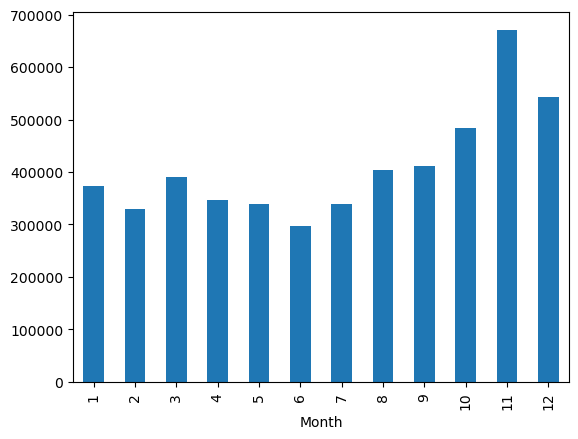

In [14]:
import matplotlib.pyplot as plt
price_sum['Price'].plot.bar()

#### 10 : les variables par clients

In [15]:
import numpy as np

results = df.groupby(by="Customer_ID").agg(Frequence=('Customer_ID','count'),
                                                Recence=('Date_purchase',lambda X: ((X.max()-pd.to_datetime("2013-11-01")).days)),
                                                Longueur=("Date_purchase",lambda X:((X.max()-X.min()).days)),
                                                Montant=("Price",'sum'),
                                                NbrP1=("Date_purchase",lambda X:((X<=pd.to_datetime("2014-06-30")).sum())),
                                                NbrP2=("Date_purchase",lambda X:((X>pd.to_datetime("2014-06-30")).sum())),
                                               )

results['Inter_Achat'] = np.where(results['Frequence']== 1,results['Longueur']/results['Frequence'], results['Longueur']/results['Frequence']-1)
results


,Frequence,Recence,Longueur,Montant,NbrP1,NbrP2,Inter_Achat
Customer_ID,,,,,,,
1,1,1,0,69.0,1,0,0.000000
2,1,3,0,350.0,1,0,0.000000
3,1,4,0,69.0,1,0,0.000000
4,1,6,0,120.0,1,0,0.000000
5,1,6,0,120.0,1,0,0.000000
...,...,...,...,...,...,...,...
1713,3,394,260,1464.0,2,1,85.666667
1714,5,59,22,951.0,5,0,3.400000
1715,12,405,399,2616.0,6,6,32.250000


#### 11: statistique des clients 

In [16]:
results[["Frequence","Recence","Longueur","Montant"]].describe().loc[['min','max','mean','std']]

,Frequence,Recence,Longueur,Montant
min,1.000000,1.000000,0.000000,69.000000
max,20.000000,454.000000,440.000000,14805.000000
mean,7.389051,273.792662,143.080373,2869.347117
std,5.388092,135.632311,117.360856,2834.170644


# Partie II:
#### 1- interprétation de la valeur 0 dans la colonne Inter_achat : 
    --> Si la valeur "Inter_achat" est égale à zéro, cela signifie que les clients effectue des achats tous les jours. Cela pourrait indiquer que ces clients est très impliqué dans l'entreprise et effectue des achats fréquents.
#### Remplacer cette valeur par la valeur moyenne de cette colonne :

In [17]:
avg_InterAchat = results[results.Inter_Achat != 0].Inter_Achat.mean()
avg_InterAchat

26.951345181937004

In [18]:
results.loc[results.Inter_Achat == 0,"Inter_Achat"] = avg_InterAchat
results 

,Frequence,Recence,Longueur,Montant,NbrP1,NbrP2,Inter_Achat
Customer_ID,,,,,,,
1,1,1,0,69.0,1,0,26.951345
2,1,3,0,350.0,1,0,26.951345
3,1,4,0,69.0,1,0,26.951345
4,1,6,0,120.0,1,0,26.951345
5,1,6,0,120.0,1,0,26.951345
...,...,...,...,...,...,...,...
1713,3,394,260,1464.0,2,1,85.666667
1714,5,59,22,951.0,5,0,3.400000
1715,12,405,399,2616.0,6,6,32.250000


#### 2-Sauvegarder le data frame  sous  "LRFMP1P2IT.xlsx"

In [19]:
results.to_excel("LRFMP1P2IT.xlsx")

#### 3-Charger le fichier généré par le modèle de clustering

In [20]:
df2 = pd.read_json("Clustering_Model_result.json")
df2

,Customer_ID,Frequency,Recency,Length,Monetary,Cluster
0,1,-1.185691,-2.011266,-1.219013,-0.988066,cluster_5
1,2,-1.185691,-1.996520,-1.219013,-0.888919,cluster_5
2,3,-1.185691,-1.989147,-1.219013,-0.988066,cluster_5
3,4,-1.185691,-1.974402,-1.219013,-0.970071,cluster_5
4,5,-1.185691,-1.974402,-1.219013,-0.970071,cluster_5
...,...,...,...,...,...,...
1712,1713,-0.814494,0.886274,0.996309,-0.495858,cluster_2
1713,1714,-0.443296,-1.583639,-1.031562,-0.676864,cluster_5
1714,1715,0.855894,0.967375,2.180654,-0.089390,cluster_1
1715,1716,-0.443296,-0.875843,-0.844112,0.006581,cluster_0


#### 4- Ajouter colonne "Cluster"

In [21]:
df1 = results


In [22]:
newdf = pd.merge(df1,df2[["Customer_ID","Cluster"]],on="Customer_ID").drop("Customer_ID",axis=1)
newdf

,Frequence,Recence,Longueur,Montant,NbrP1,NbrP2,Inter_Achat,Cluster
0,1,1,0,69.0,1,0,26.951345,cluster_5
1,1,3,0,350.0,1,0,26.951345,cluster_5
2,1,4,0,69.0,1,0,26.951345,cluster_5
3,1,6,0,120.0,1,0,26.951345,cluster_5
4,1,6,0,120.0,1,0,26.951345,cluster_5
...,...,...,...,...,...,...,...,...
1712,3,394,260,1464.0,2,1,85.666667,cluster_2
1713,5,59,22,951.0,5,0,3.400000,cluster_5
1714,12,405,399,2616.0,6,6,32.250000,cluster_1
1715,5,155,44,2888.0,5,0,7.800000,cluster_0


#### 5- Pour chaque groupe de client, calculer les moyennes

In [23]:
newdff = newdf.groupby(by="Cluster").agg(Count=('Cluster','count'),
                                         Mean_L=('Longueur','mean'),
                                         Mean_R=('Recence','mean'),
                                         Mean_F=('Frequence','mean'),
                                         Mean_M=('Montant','mean'),
                                                   )
newdff

,Count,Mean_L,Mean_R,Mean_F,Mean_M
Cluster,,,,,
cluster_0,262,93.896947,162.339695,7.423664,2644.549618
cluster_1,189,289.227513,379.830688,12.788360,4212.687831
cluster_2,339,271.362832,377.206490,5.147493,1723.233038
cluster_3,250,81.100000,378.832000,4.172000,1449.260000
cluster_4,138,210.717391,378.637681,15.014493,10454.202899
cluster_5,377,23.063660,83.185676,2.610080,891.283820
cluster_6,162,101.006173,306.092593,15.314815,4397.617284


#### 6- Ajouter  LRFM-Pattern:


In [24]:
newdff["Pattern"] = ""
meandf = newdf.mean(numeric_only=True)  
newdff['Pattern'] = np.where(meandf.Longueur > newdff.Mean_L, newdff.Pattern + "l",newdff.Pattern + "L")
newdff['Pattern'] = np.where(meandf.Recence > newdff.Mean_R, newdff.Pattern + "r",newdff.Pattern + "R")
newdff['Pattern'] = np.where(meandf.Frequence > newdff.Mean_F, newdff.Pattern + "f",newdff.Pattern + "F")
newdff['Pattern'] = np.where(meandf.Montant > newdff.Mean_M, newdff.Pattern + "m",newdff.Pattern + "M")
newdff[meandf.Longueur > newdff.Mean_L]


,Count,Mean_L,Mean_R,Mean_F,Mean_M,Pattern
Cluster,,,,,,
cluster_0,262,93.896947,162.339695,7.423664,2644.549618,lrFm
cluster_3,250,81.100000,378.832000,4.172000,1449.260000,lRfm
cluster_5,377,23.063660,83.185676,2.610080,891.283820,lrfm
cluster_6,162,101.006173,306.092593,15.314815,4397.617284,lRFM


#### 7- Interpréter les résultats trouvés :

Le modèle "LRFM" : les clients du cluster_1 et du cluster_4 ont la langueur, la récence, la fréquence et la valeur monétaire les plus élevées, et sont les clients les plus précieux pour l'entreprise.
--> Pour les clients du cluster_1 et du cluster_4 : Vous pouvez envisager de mettre en place un programme de fidélité pour récompenser ces clients de leur fidélité, vous pouvez également envisager d'offrir un excellent service client pour que ces clients restent satisfaits et fidèles.

Les clients des cluster_2, cluster_3, cluster_6 et cluster_0 ont une langueur, une récence, une fréquence et une valeur monétaire inférieures à celles des clients des cluster_1 et cluster_4. Les modèles "LRfm", "lRfm", "lRFM" et "lrFm"  indiquent que ces clients sont moins susceptibles de faire un achat.
--> Vous pouvez les cibler avec des offres et promotions personnalisées pour les inciter à faire des achats.

Les clients du cluster_5 ont la langueur, la récence, la fréquence et la valeur monétaire les plus faibles de tous les clusters, et le modèle "lrfm" indique que les quatre variables sont relativement faibles. Ces clients sont probablement les moins précieux pour l'entreprise et peuvent être moins susceptibles de faire un achat.
--> Vous pouvez envisager de cibler ces clients avec des offres et des promotions personnalisées pour les réactiver et les inciter à faire plus d'achats.


In [25]:
newdff.sort_values(by=["Pattern"])

,Count,Mean_L,Mean_R,Mean_F,Mean_M,Pattern
Cluster,,,,,,
cluster_1,189,289.227513,379.830688,12.788360,4212.687831,LRFM
cluster_4,138,210.717391,378.637681,15.014493,10454.202899,LRFM
cluster_2,339,271.362832,377.206490,5.147493,1723.233038,LRfm
cluster_6,162,101.006173,306.092593,15.314815,4397.617284,lRFM
cluster_3,250,81.100000,378.832000,4.172000,1449.260000,lRfm
cluster_0,262,93.896947,162.339695,7.423664,2644.549618,lrFm
cluster_5,377,23.063660,83.185676,2.610080,891.283820,lrfm


In [26]:
results[["Frequence","Recence","Longueur","Montant"]].describe()

,Frequence,Recence,Longueur,Montant
count,1717.000000,1717.000000,1717.000000,1717.000000
mean,7.389051,273.792662,143.080373,2869.347117
std,5.388092,135.632311,117.360856,2834.170644
min,1.000000,1.000000,0.000000,69.000000
25%,3.000000,150.000000,35.000000,1047.000000
50%,6.000000,344.000000,121.000000,1885.000000
75%,10.000000,386.000000,238.000000,3699.000000
max,20.000000,454.000000,440.000000,14805.000000


#### 8- Visualisation: 
   

C:\Users\AB-Ghost\AppData\Local\Temp\ipykernel_5496\232503925.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0, 0].set_xticklabels( (0,1,2,3,4,5,6) )
C:\Users\AB-Ghost\AppData\Local\Temp\ipykernel_5496\232503925.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1, 0].set_xticklabels( (0,1,2,3,4,5,6) )
C:\Users\AB-Ghost\AppData\Local\Temp\ipykernel_5496\232503925.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0, 1].set_xticklabels( (0,1,2,3,4,5,6) )
C:\Users\AB-Ghost\AppData\Local\Temp\ipykernel_5496\232503925.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1, 1].set_xticklabels( (0,1,2,3,4,5,6) )


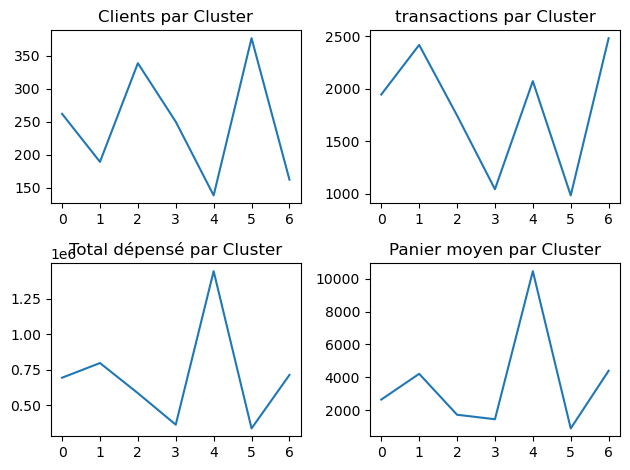

In [27]:
newdff2 = newdf.groupby("Cluster")
figure, axis = plt.subplots(2, 2)
axis[0, 0].plot(newdff.index,newdff.Count)
axis[0, 0].set_title("Clients par Cluster")
axis[0, 0].set_xticklabels( (0,1,2,3,4,5,6) )
axis[1, 0].plot(newdff.index,newdff2.Montant.sum())
axis[1, 0].set_title("Total dépensé par Cluster")
axis[1, 0].set_xticklabels( (0,1,2,3,4,5,6) )
axis[0, 1].plot(newdff.index,newdff2.Frequence.sum())
axis[0, 1].set_title("transactions par Cluster")
axis[0, 1].set_xticklabels( (0,1,2,3,4,5,6) )
axis[1, 1].plot(newdff.index,newdff.Mean_M)
axis[1, 1].set_title("Panier moyen par Cluster")
axis[1, 1].set_xticklabels( (0,1,2,3,4,5,6) )
figure.tight_layout()
plt.show()


##### a -Nombre de clients par Cluster

Text(0, 0.5, 'nombre de clients')

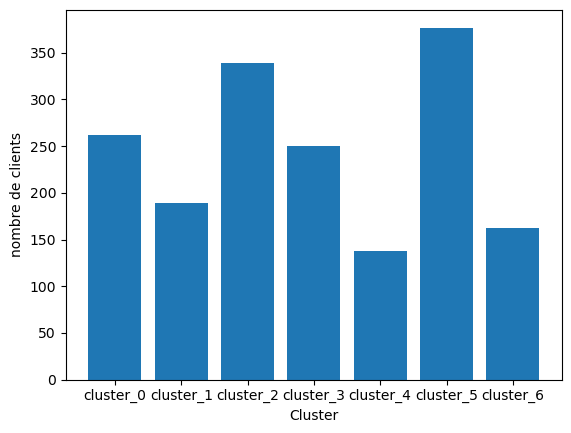

In [28]:
plt.bar(newdff.index,newdff.Count)
plt.xlabel("Cluster")
plt.ylabel("nombre de clients")

##### b-Total dépensé par Cluster

Text(0.5, 0, 'Cluster')

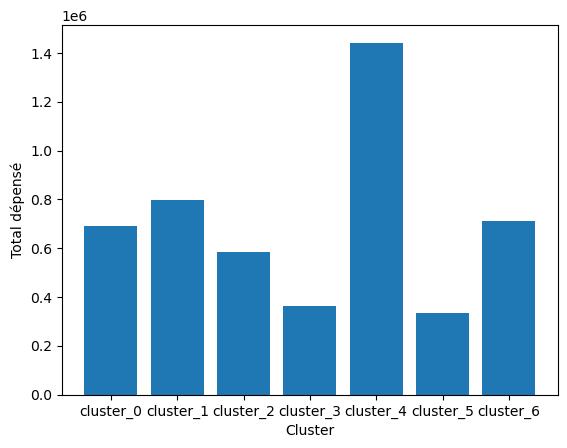

In [29]:
plt.bar(newdff.index,newdff2.Montant.sum())
plt.ylabel("Total dépensé")
plt.xlabel("Cluster")

#### c-Nombre de transaction par Cluster

Text(0, 0.5, 'Nombre de transactions')

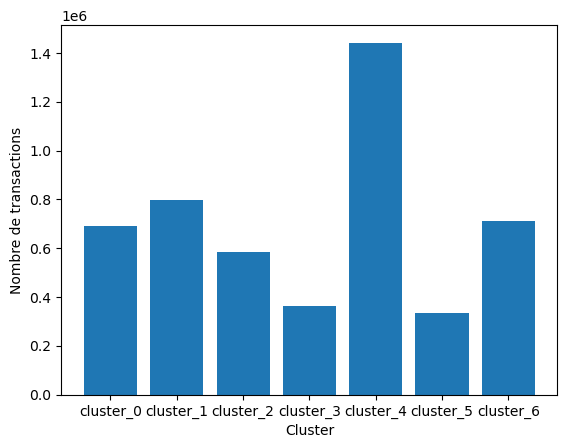

In [30]:
plt.bar(newdff.index,newdff2.Montant.sum())
plt.xlabel("Cluster")
plt.ylabel("Nombre de transactions")

#### d-  Panier moyen par Cluster

Text(0, 0.5, 'Panier Moyen')

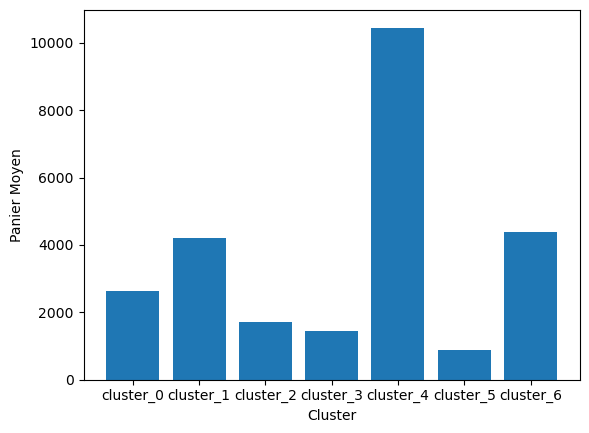

In [31]:
plt.bar(newdff.index,newdff.Mean_M)
plt.xlabel("Cluster")
plt.ylabel("Panier Moyen")